## **Extracting the data**

In [7]:
import yfinance as yf

# Define the ticker symbol for Jupiter Wagons
ticker_symbol = "IRFC.NS"  # Adjust this ticker symbol if it's different for Jupiter Wagons on the Indian stock market

# Download the historical data
data = yf.download(ticker_symbol, start="2022-04-01", end="2024-03-31")

# Display the first few rows of the data
print(data.head())

# Save the data to a CSV file
data.to_csv("irfc_historical_data.csv")

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-04-01  21.400000  21.600000  21.350000  21.500000  19.896143  10607411
2022-04-04  21.600000  21.850000  21.549999  21.650000  20.034954  13261803
2022-04-05  21.650000  22.299999  21.650000  22.150000  20.497656   8377562
2022-04-06  22.049999  22.299999  22.000000  22.100000  20.451385   6691801
2022-04-07  22.200001  22.350000  22.150000  22.299999  20.636463   6164467


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [11]:
# Load the data
file_path = 'irfc_historical_data.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the data
print(data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-04-01  21.400000  21.600000  21.350000  21.500000  19.896143  10607411
2022-04-04  21.600000  21.850000  21.549999  21.650000  20.034954  13261803
2022-04-05  21.650000  22.299999  21.650000  22.150000  20.497656   8377562
2022-04-06  22.049999  22.299999  22.000000  22.100000  20.451385   6691801
2022-04-07  22.200001  22.350000  22.150000  22.299999  20.636463   6164467


In [15]:
# Clean the data: Drop columns that are not needed
data = data[['Close']]

# Check for missing values
print("Missing values before interpolation:")
print(data.isnull().sum())

Missing values before interpolation:
Close    0
dtype: int64


In [17]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Check for missing values again
print("Missing values after interpolation:")
print(data.isnull().sum())

Missing values after interpolation:
Close    0
dtype: int64


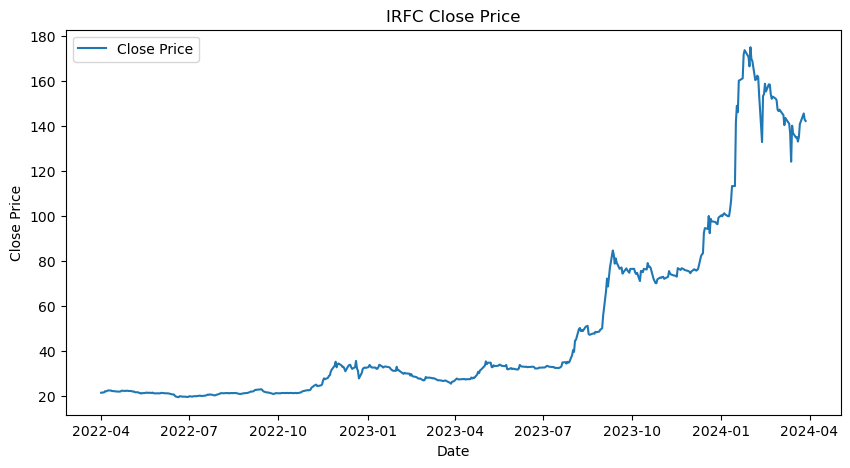

In [19]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Close Price')
plt.title('IRFC Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [21]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

In [23]:
# Display the sizes of the train and test datasets
print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

# Display the first few rows of the train and test datasets
print("Training data:\n", train_data.head())
print("Test data:\n", test_data.head())

Training data size: 344
Test data size: 148
Training data:
                 Close
Date                 
2022-04-01  21.500000
2022-04-04  21.650000
2022-04-05  22.150000
2022-04-06  22.100000
2022-04-07  22.299999
Test data:
                 Close
Date                 
2023-08-22  47.849998
2023-08-23  47.750000
2023-08-24  48.599998
2023-08-25  48.400002
2023-08-28  48.700001


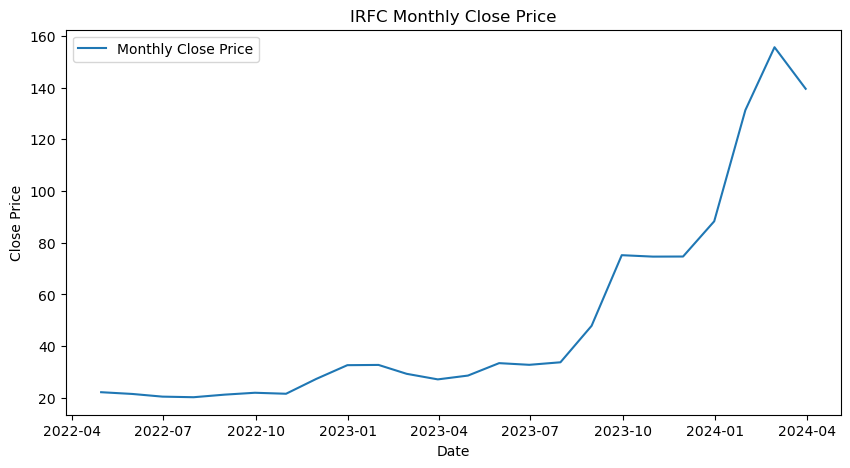

In [27]:
# Convert the data to monthly frequency
monthly_data = data.resample('M').mean()

# Plot the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Close Price')
plt.title('IRFC Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

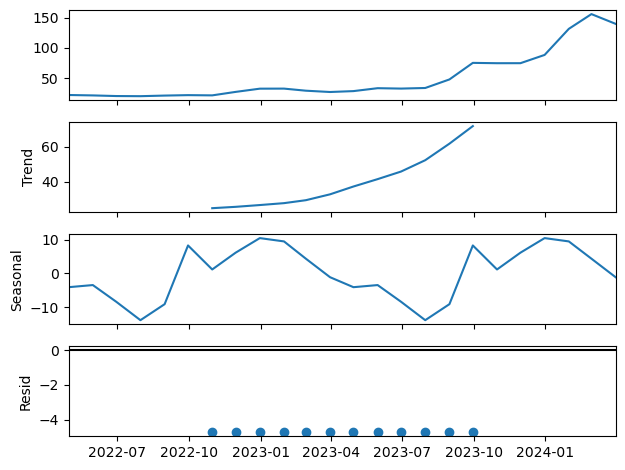

In [29]:
# Decompose the time series using additive model
additive_decompose = seasonal_decompose(monthly_data, model='additive')
additive_decompose.plot()
plt.show()

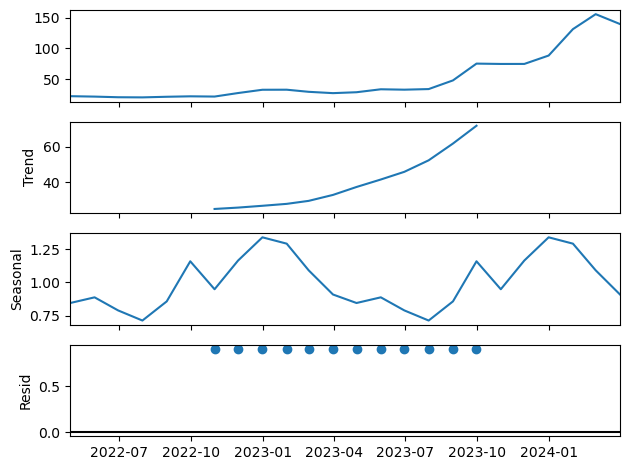

In [31]:
# Decompose the time series using multiplicative model
multiplicative_decompose = seasonal_decompose(monthly_data, model='multiplicative')
multiplicative_decompose.plot()
plt.show()

# 1. **Univariate Forecasting - Conventional Models/Statistical Models**

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

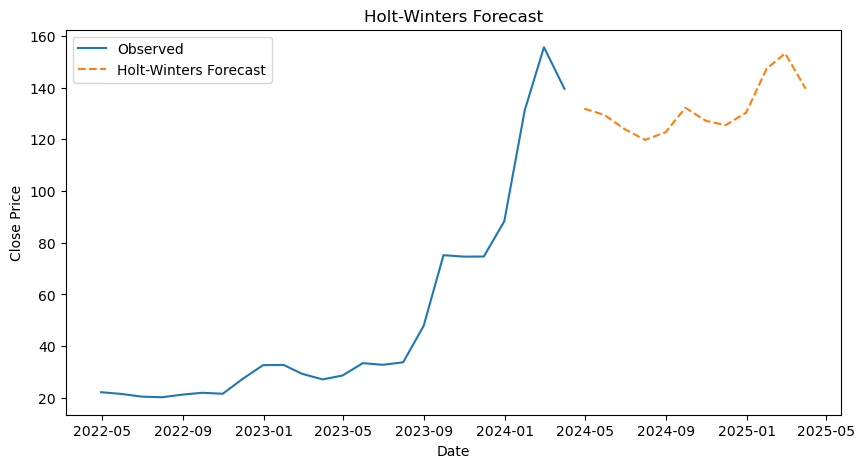

In [34]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [39]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Convert the data to daily frequency
daily_data = data.resample('D').mean()

# Interpolate missing values in the daily data (if any)
daily_data.interpolate(method='time', inplace=True)

# Display the first few rows of the daily data
print(daily_data.head())

# Save the daily data to a new CSV file
daily_data.to_csv('daily_jupiter_wagons_data.csv')

            Close
Date             
2022-04-01  21.50
2022-04-02  21.55
2022-04-03  21.60
2022-04-04  21.65
2022-04-05  22.15


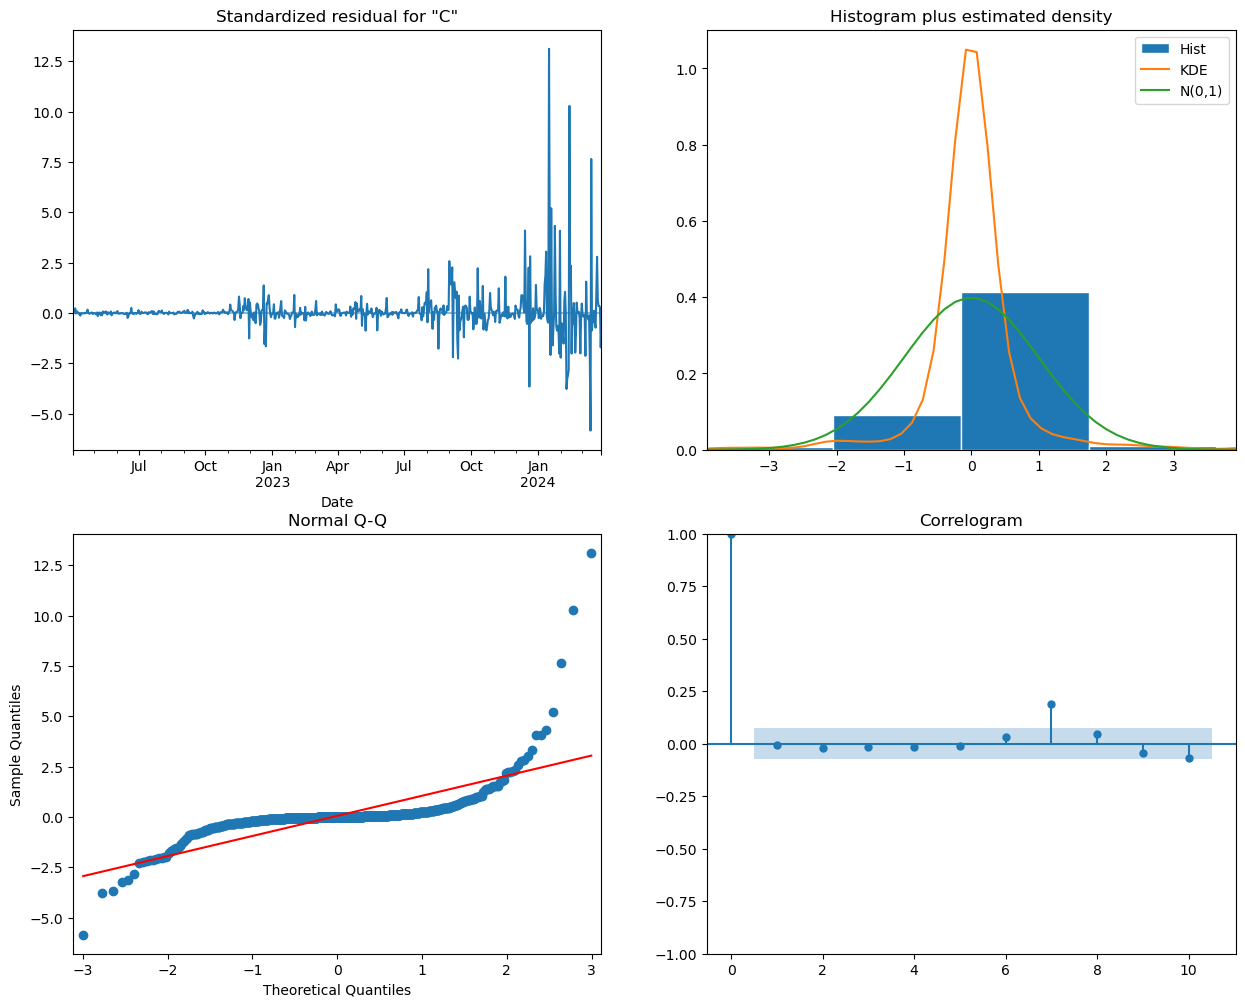

In [41]:
import statsmodels.api as sm

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(daily_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

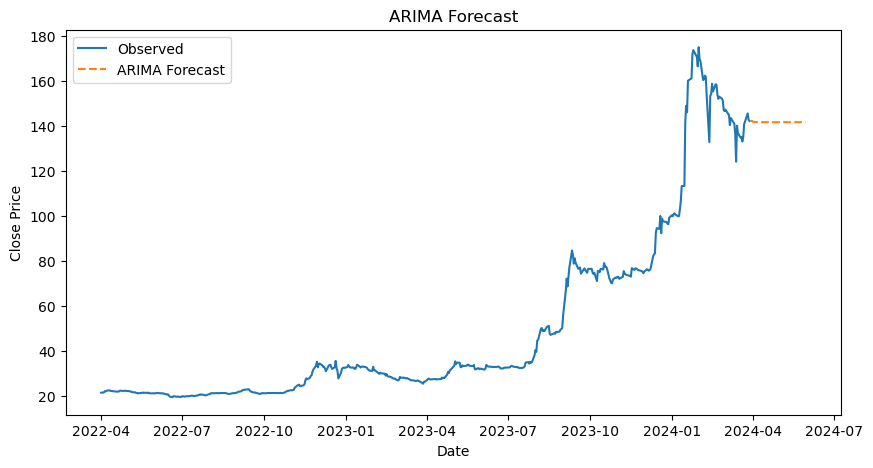

In [42]:
# Forecast for the next 3 months (assuming 21 trading days per month)
arima_forecast = arima_model.forecast(steps=63)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Adarsh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


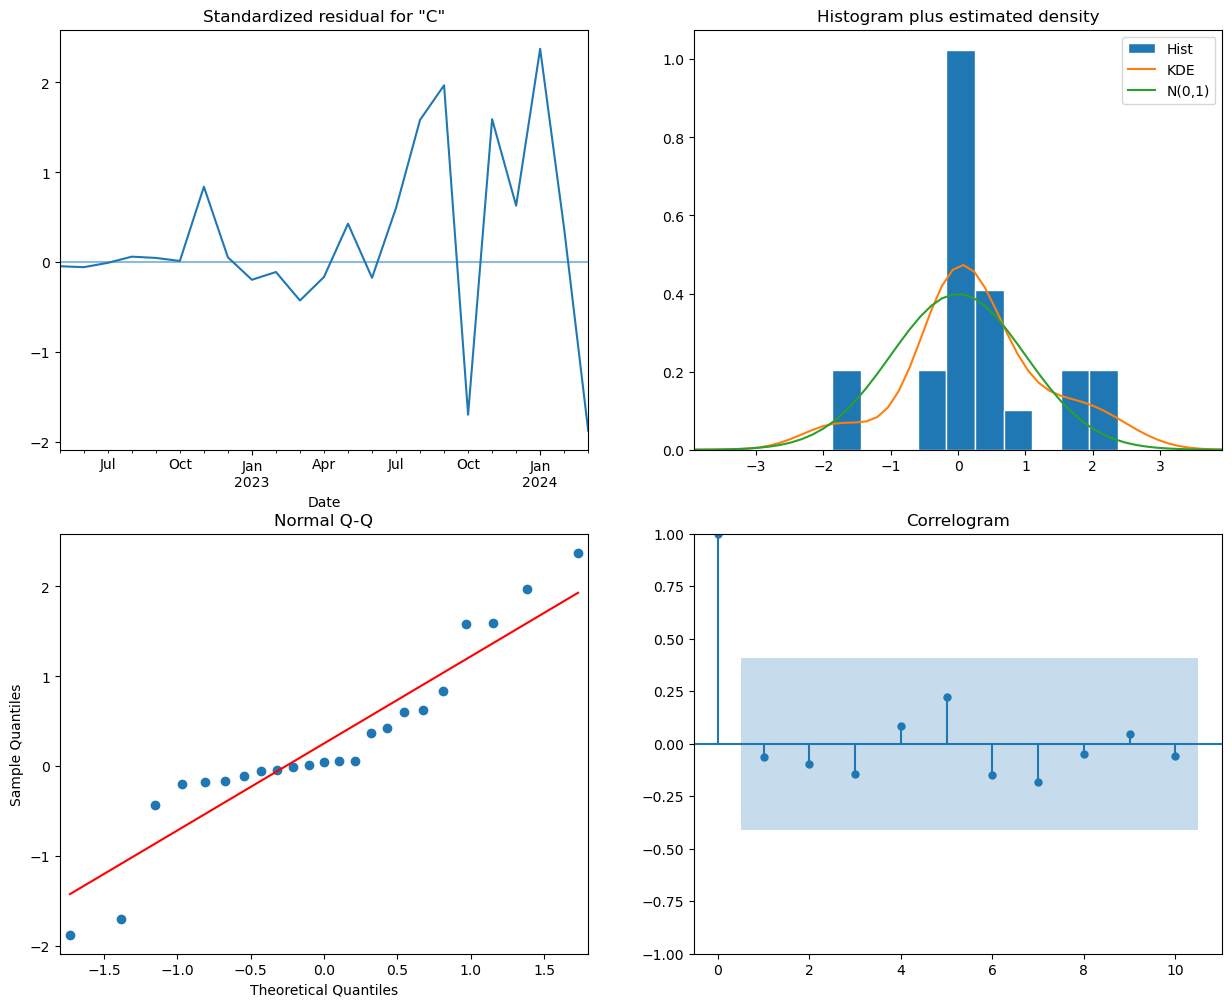

In [45]:
# Fit the ARIMA model on the monthly data
arima_model = sm.tsa.ARIMA(monthly_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

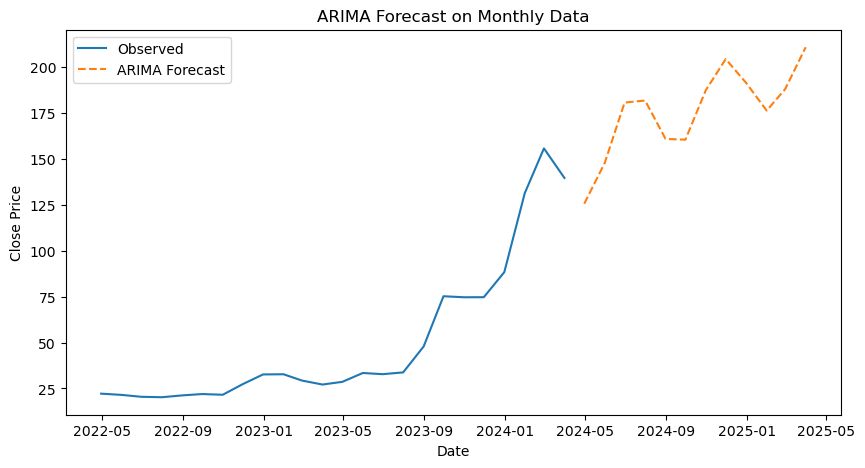

In [47]:
# Forecast for the next 12 months
arima_forecast = arima_model.forecast(steps=12)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast on Monthly Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

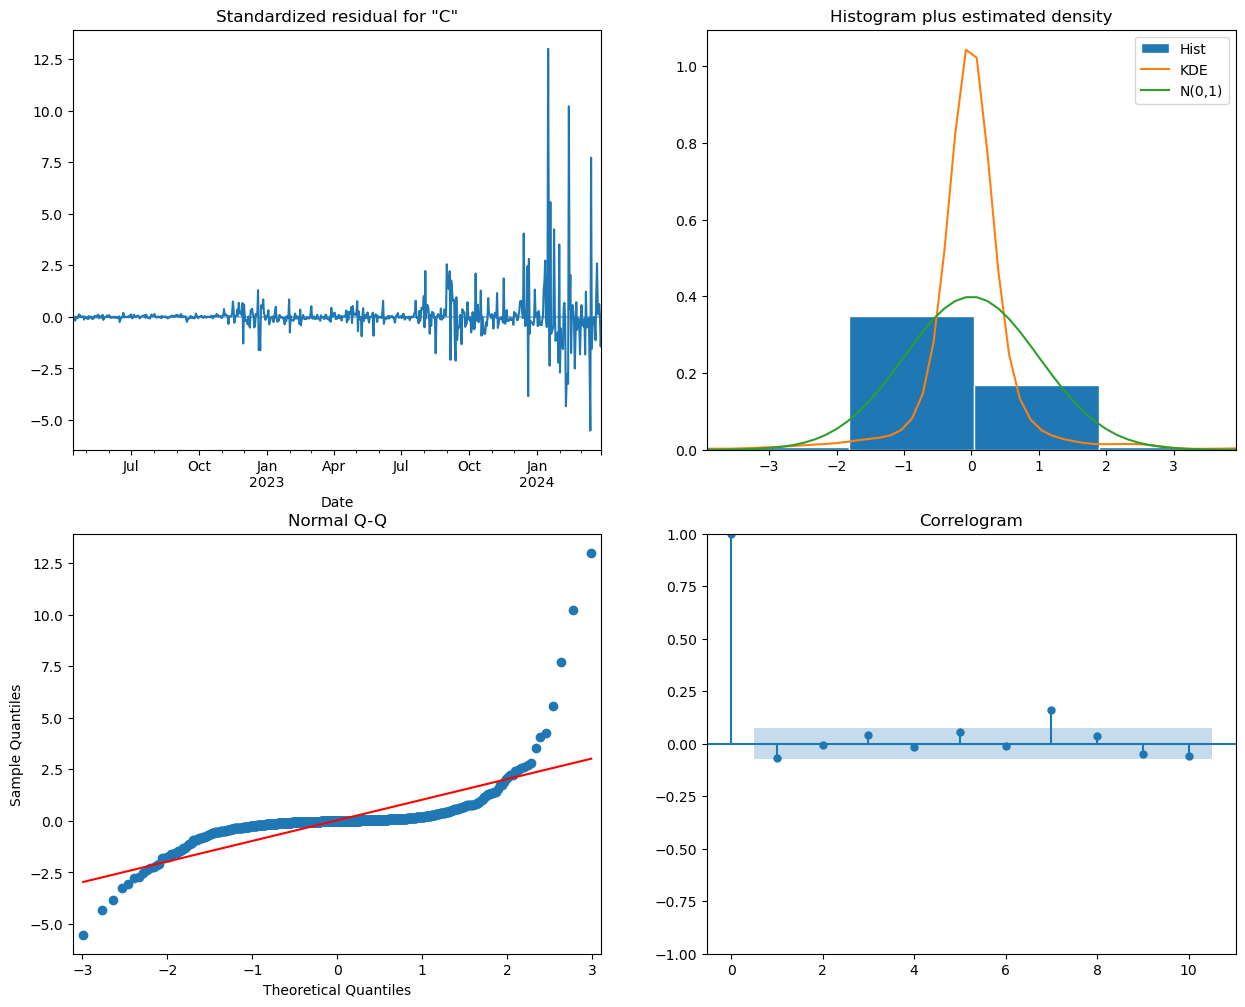

In [51]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Diagnostic checks for SARIMA model
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

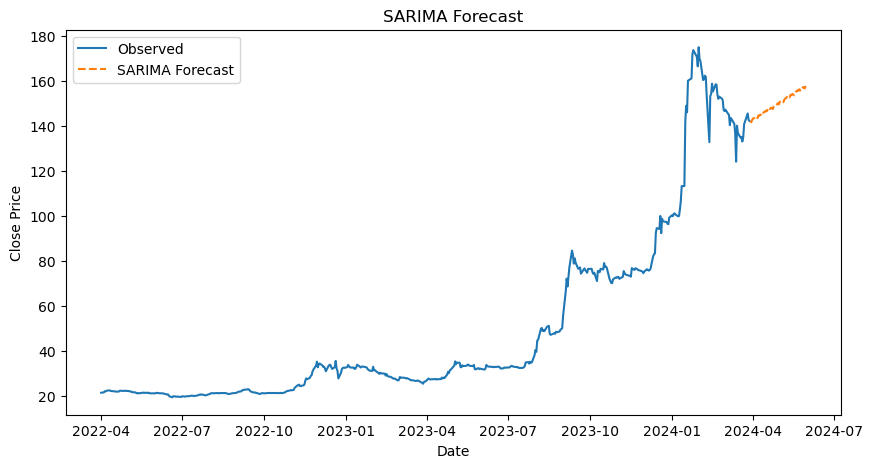

In [52]:
# Forecast for the next 3 months (assuming 21 trading days per month)
sarima_forecast = sarima_model.forecast(steps=63)

# Plot the SARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 2. **Multivariate Forecasting - Machine Learning Models**

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [56]:
# Load the data
file_path = 'irfc_historical_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [57]:
# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [58]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

In [63]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Adarsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"LSTM Mean Squared Error: {loss}")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 8.2213e-04 - val_loss: 0.0586
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0070 - val_loss: 0.0224
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6094e-04 - val_loss: 0.0103
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.2499e-04 - val_loss: 0.0105
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7499e-04 - val_loss: 0.0762
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9529e-04 - val_loss: 0.0140
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.3260e-04 - val_loss: 0.0428
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1563e-04 - val_loss: 0.0120
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.6831e-04 - val_loss: 0.0320
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.1447e-04 - val_loss: 0.0106
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.7905e-04 - val_loss: 0.0153
Epoch 12/20
12/12 ━━━━━

In [67]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


In [69]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 204091910.87325478, True Value: 201306151.3794996
Prediction: 204476498.36187547, True Value: 199647045.95248955
Prediction: 204661275.4876396, True Value: 199094001.43381524
Prediction: 204674410.32960433, True Value: 197619225.42702153
Prediction: 204424437.86846322, True Value: 211629555.2980432
Prediction: 206680466.69451582, True Value: 208680003.2844557
Prediction: 208678416.39915222, True Value: 211445197.74881425
Prediction: 210510350.5947371, True Value: 210892153.23013997
Prediction: 211786157.63385475, True Value: 210154779.29124948
Prediction: 212414800.0636689, True Value: 208680003.2844557


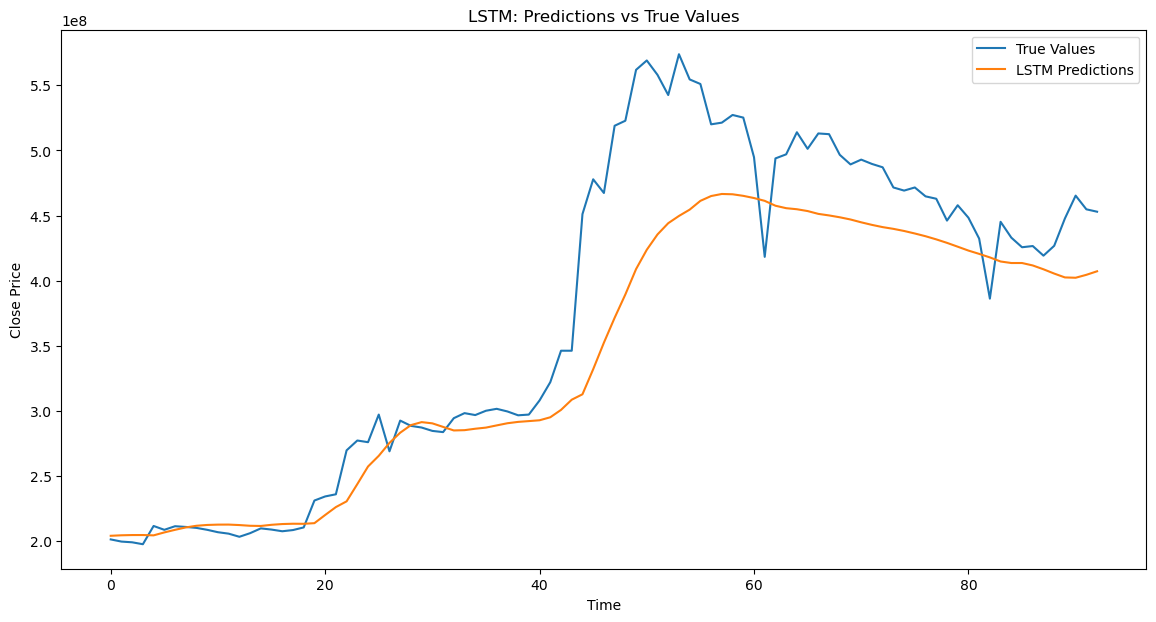

In [71]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [75]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(data.values, sequence_length)

# Reshape X to 2D array for tree-based models
X_reshaped = X.reshape(X.shape[0], -1)

In [77]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [79]:
# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

Decision Tree Mean Squared Error: 3668.791495295719


In [81]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 3345.304048505723


In [83]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 73.05000305175781, True Value: 74.0999984741211
Prediction: 74.5999984741211, True Value: 73.6500015258789
Prediction: 73.05000305175781, True Value: 73.5
Prediction: 73.05000305175781, True Value: 73.0999984741211
Prediction: 75.5999984741211, True Value: 76.9000015258789
Prediction: 75.0999984741211, True Value: 76.0999984741211
Prediction: 75.0999984741211, True Value: 76.8499984741211
Prediction: 72.94999694824219, True Value: 76.69999694824219
Prediction: 73.05000305175781, True Value: 76.5
Prediction: 73.05000305175781, True Value: 76.0999984741211


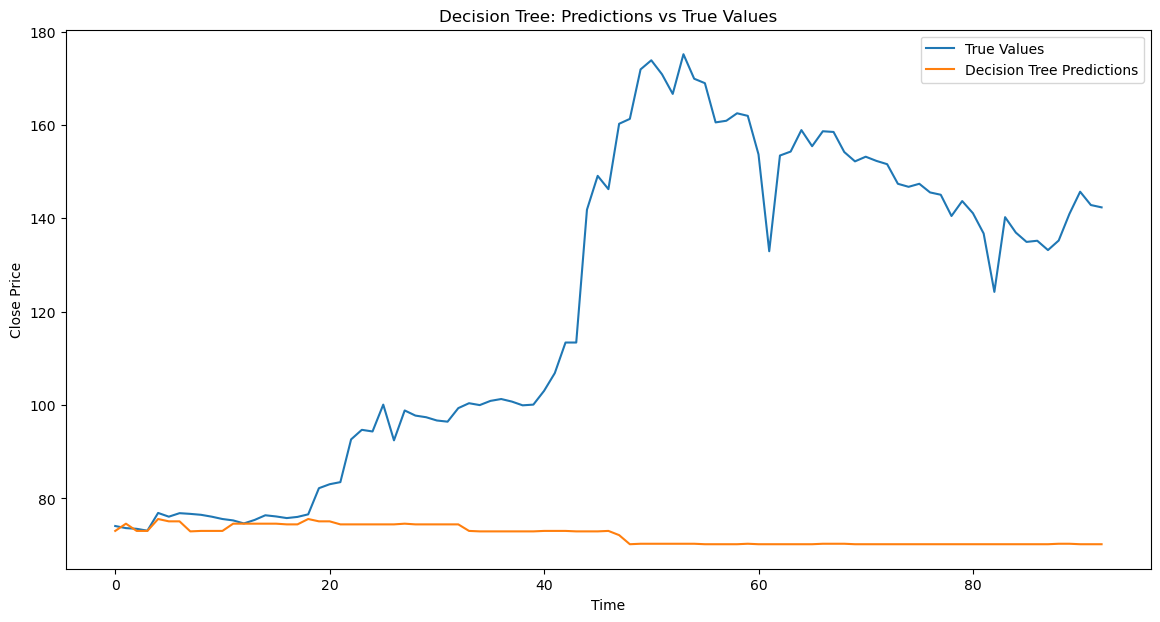

In [85]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [87]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 74.18149932861328, True Value: 74.0999984741211
Prediction: 74.02599967956543, True Value: 73.6500015258789
Prediction: 73.83249946594238, True Value: 73.5
Prediction: 73.93799949645997, True Value: 73.0999984741211
Prediction: 74.14699966430663, True Value: 76.9000015258789
Prediction: 74.53849922180176, True Value: 76.0999984741211
Prediction: 74.8054995727539, True Value: 76.8499984741211
Prediction: 74.51949920654297, True Value: 76.69999694824219
Prediction: 74.5244995880127, True Value: 76.5
Prediction: 74.55199966430663, True Value: 76.0999984741211


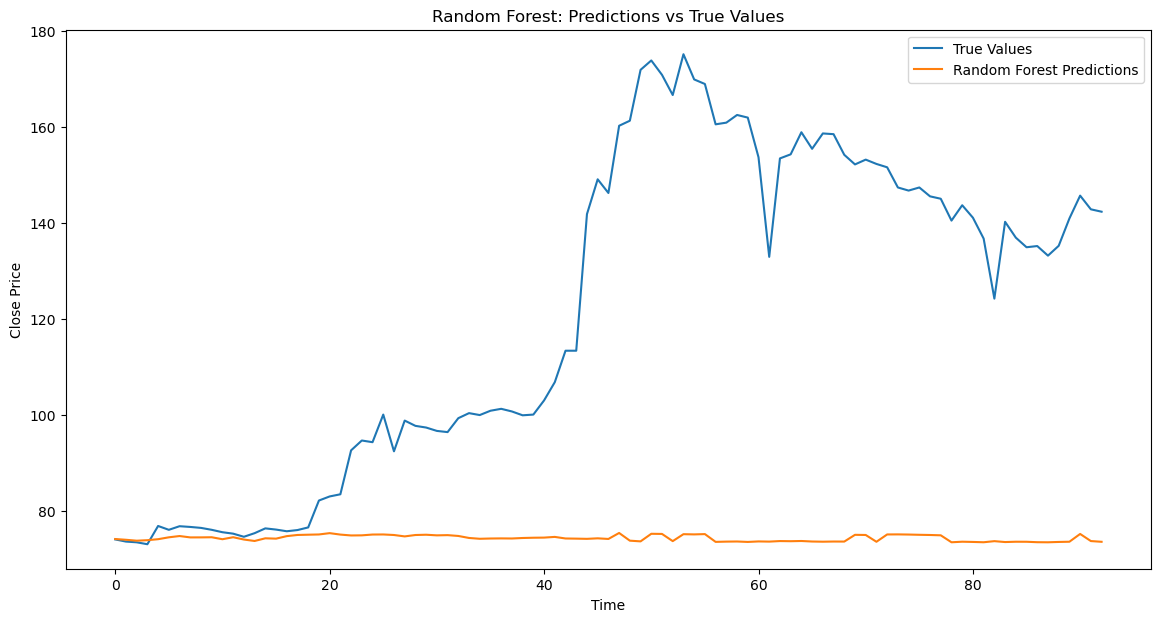

In [89]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

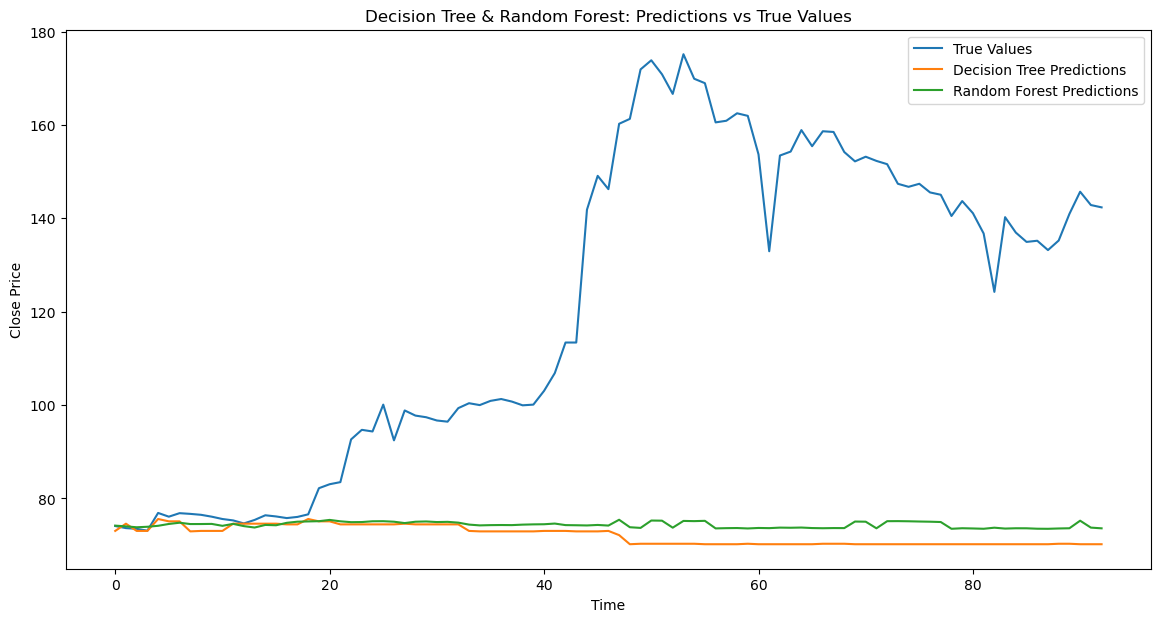

In [91]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()